# 1. Standard Scaling

**Standard scaling** is a method of scaling the data to have a distribution centered around 0, with a standard deviation of 1. This is achieved by subtracting the mean (μ) of the data from each data point and then dividing by the standard deviation (σ) of the data. Standard scaling is widely used in various machine learning algorithms.

The formula for standard scaling is as follows:

\[ z = \frac{{x - \mu}}{{\sigma}} \]

where:
- \( z \) is the standardized value,
- \( x \) is the original value,
- \( \mu \) is the mean of the data,
- \( \sigma \) is the standard deviation of the data.


In [16]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [17]:
# make an example dataset
df = {
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],
    'weight': [55, 60, 65, 70, 75]
}

# convert this data to a Pandas DataFrame
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [18]:
# import the scaler
scaler = StandardScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# min-max scalar

In [19]:
# import the scaler
scaler = MinMaxScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)

# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [20]:
# import the scaler
scalar = MaxAbsScaler()

# fit the scaler on data
scaled_df = scalar.fit_transform(df)
scaled_df

# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [21]:
from sklearn.preprocessing import RobustScaler

# import the scaler
scalar = RobustScaler()

# fit the scaler on data
scaled_df = scalar.fit_transform(df)
scaled_df

# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


# Transformation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

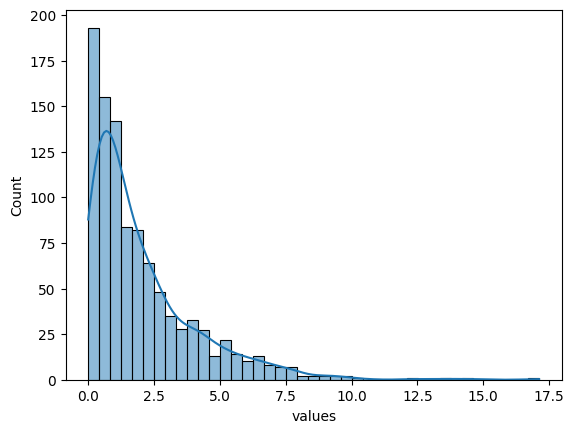

In [24]:
sns.histplot(df['values'], kde=True)

In [25]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Create instances of transformers
pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# Box-Cox transformation (data must be positive for Box-Cox)
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)

# Yeo-Johnson transformation
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])

# Quantile transformation
df['Quantile_Transform'] = qt_normal.fit_transform(df[['values']])

# Display the transformed DataFrame
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile_Transform
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


In [26]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile_Transform
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


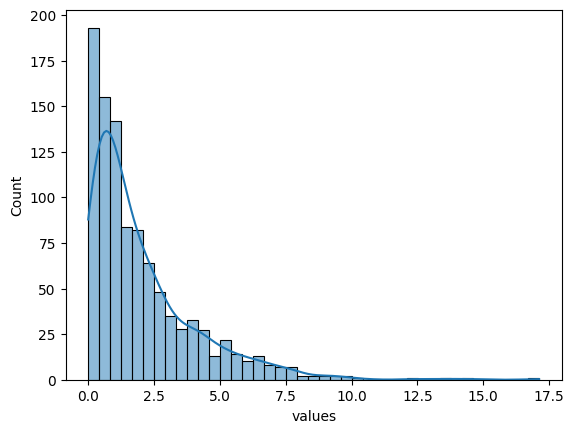

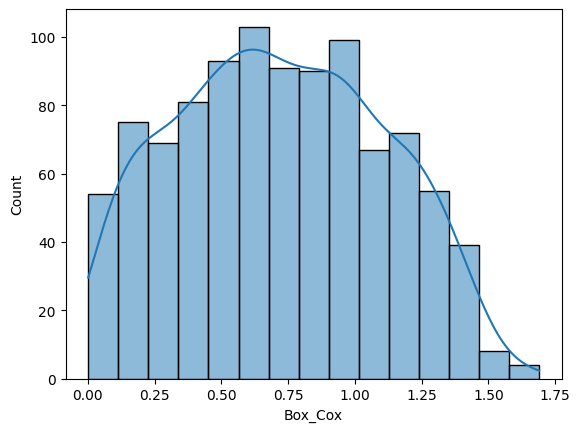

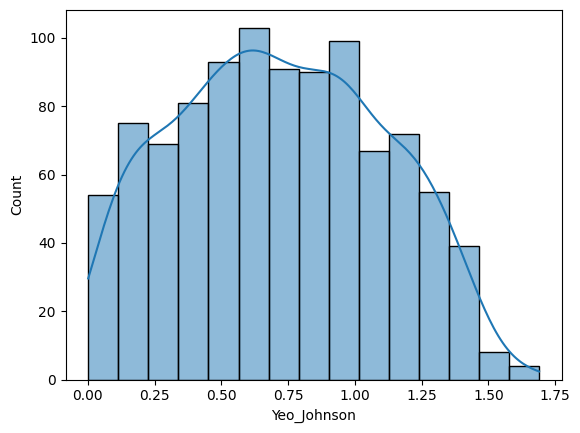

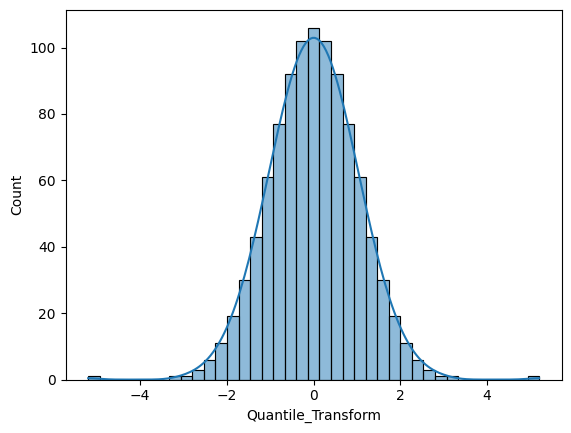

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms for all columns using sns.hist and kde=true with a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

### L2 Normalization:

L2 normalization is a technique that rescales each sample (row) in a dataset to have unit norm. This type of normalization is commonly used when dealing with text data or other scenarios where the magnitude of individual samples is important.

The L2 norm is calculated as the square root of the sum of the squared vector values:

\[ \text{L2 norm} = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} \]

In [31]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Sample data
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]

# Create a Normalizer instance with L2 normalization
normalizer = Normalizer(norm='l2')

# Fit and transform the data
normalized_data_l2 = normalizer.fit_transform(data)

# Print the result
print(normalized_data_l2)

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization:

L1 normalization is a technique that rescales each sample (row) in a dataset, ensuring that the sum of the absolute values of the vector elements is equal to 1. This approach is particularly useful when dealing with sparse data or situations where the magnitude of individual elements matters more than their actual values.

The L1 norm is calculated as the sum of the absolute vector values:

\[ \text{L1 norm} = |x_1| + |x_2| + \ldots + |x_n| \]

In [32]:
from sklearn.preprocessing import Normalizer

# Sample data
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]

# Create a Normalizer instance with L1 normalization
normalizer = Normalizer(norm='l1')

# Fit and transform the data
normalized_data_l1 = normalizer.fit_transform(data)

# Print the result
print(normalized_data_l1)

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation 

In [33]:
import pandas as pd
import numpy as np

# Example dataset with skewed values
df_data = {"Values": [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]}
df = pd.DataFrame(df_data)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [34]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


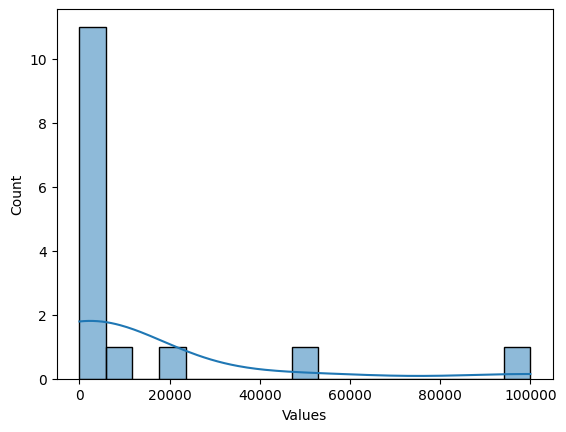

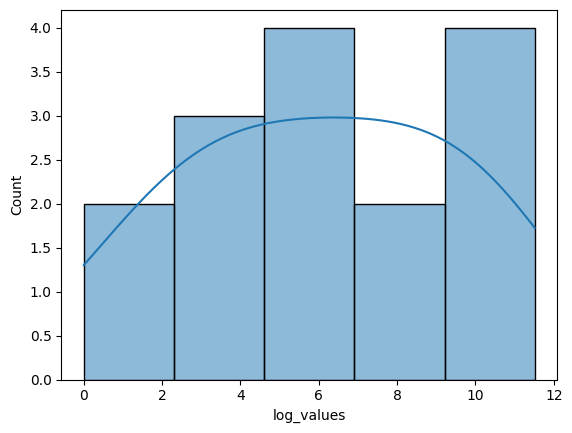

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()